In [1]:
import random
import sys
from tensorflow import keras
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import string
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import unicodedata
import urllib3
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
from ast import literal_eval
df = pd.read_csv('5min_seq_intVec_added_max_clst.csv')
condition = (df.cluster == 2)
df_clst2_100 = df[condition]
df_clst2_100

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
1              1             1               1                 1   
3              3             3               3                 3   
16            16            16              16                16   
40            40            40              40                40   
43            43            43              43                43   
...          ...           ...             ...               ...   
2758        2758          2758            2758              2758   
2765        2765          2765            2765              2765   
2775        2775          2775            2775              2775   
2777        2777          2777            2777              2777   
2781        2781          2781            2781              2781   

      Unnamed: 0.1.1.1.1              id  \
1                      1  20081112023003   
3                      3  20090330005208   
16                    16  20090422023859   
40                    40  20090531092136   
43                    43  20090603064302   
...                  ...             ...   
2758                2758  20071209063433   
2765                2765  20080904085805   
2775                2775  20081117030421   
2777                2777  20071210032337   
2781                2781  20080217010131   

                                               sequence     time  user_id  \
1     Bs0001Ux0001Ux0001Ux0001Ux0001Ux0001Ux0001Ux00...  2:37:00        0   
3     -----Ux0003Ux0003Ux0003Ux0003Ux0003Ux0003Ux000...  5:27:00        0   
16    ----Ux0004Ux0004Ux0004Ux0004Ux0004Ux0004Ux0004...  2:18:00        0   
40    --Rx0021Rx0021Rx0021Rx0021Rx0021Rx0021Rx0021-U...  2:33:00        0   
43    --Sx0001Sx0001Sx0001Sx0001Sx0001Sx0001Sx0001Sx...  9:46:00        0   
...                                                 ...      ...      ...   
2758  ---Ux0248Ux0248Ux0248Ux0248Ux0248-Rx2637Rx2637...  4:14:00      176   
2765  --Rx2934------------Rx2612Rx2612Rx2612Rx2612Rx...  5:04:00      179   
2775  --------Sx0014Sx0014Sx0014Sx0014Sx0014Sx0014Sx...  4:09:00      179   
2777  Rx1083-Sm0018Sm0018Sm0018Sm0018Sm0018Sm0018Sm0...  2:02:00      181   
2781  Rx2943-----Sx2121Sx2121Sx2121Sx2121Sx2121Sx212...  4:21:00      181   

             time_min  ...   diff_mean  \
1     0 days 02:37:00  ... -237.774194   
3     0 days 05:27:00  ...  -67.774194   
16    0 days 02:18:00  ... -256.774194   
40    0 days 02:33:00  ... -241.774194   
43    0 days 09:46:00  ...  191.225806   
...               ...  ...         ...   
2758  0 days 04:14:00  ...   38.000000   
2765  0 days 05:04:00  ...   -7.062500   
2775  0 days 04:09:00  ...  -62.062500   
2777  0 days 02:02:00  ... -208.166667   
2781  0 days 04:21:00  ...  -69.166667   

                                                trimmed trimmed_cnt  \
1     ["'Bs0001'", " 'Ux0001'", " 'Kx0001'", " 'Ux00...           4   
3     ["'Ux0003'", " 'Sx0042'", " 'Sx0001'", " 'Sx00...           4   
16    ["'Ux0004'", " 'Rx0029'", " 'Ux0004'", " 'Ux00...           4   
40    ["'Rx0021'", " 'Ux0004'", " 'Mx0001'", " 'Sm00...           4   
43    ["'Sx0001'", " 'Rx0004'", " 'Sx0045'", " 'Rx03...           4   
...                                                 ...         ...   
2758  ["'Ux0248'", " 'Rx2637'", " 'Rx2932'", " 'Ux00...           4   
2765  ["'Rx2934'", " 'Rx2612'", " 'Rx0229'", " 'Sx13...           4   
2775  ["'Sx0014'", " 'Rx1261'", " 'Sx0406'", " 'Sx15...           4   
2777  ["'Rx1083'", " 'Sm0018'", " 'Sx0831'", " 'Rx16...           4   
2781  ["'Rx2943'", " 'Sx2121'", " 'Rx2381'", " 'Rx00...           4   

           durations  silhouette_coeff  \
1       [1, 9, 2, 1]          0.054118   
3     [33, 16, 6, 5]          0.120009   
16     [8, 24, 2, 6]          0.145421   
40     [7, 26, 3, 1]          0.502393   
43    [84, 8, 46, 1]          0.513810   
...              ...               ...   
2758  [5, 27, 1, 26]          0.115652   
2765   [1, 35, 1, 2]          0.499628   

In [4]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# train_seq = 
avg = df_clst2_100['length_vec'].mean()
med = df_clst2_100['length_vec'].median()
print(avg)
print(med)

58.481327800829874
49.0


In [5]:
from ast import literal_eval
df_clst2_100['seq_int_vec'] = df_clst2_100['seq_int_vec'].apply(lambda x: literal_eval(str(x)))

C:\Users\User\AppData\Local\Temp/ipykernel_11484/1354551308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clst2_100['seq_int_vec'] = df_clst2_100['seq_int_vec'].apply(lambda x: literal_eval(str(x)))


In [6]:
all_data = df_clst2_100['seq_int_vec']
all_data = all_data.values
all_data

array([list([131, 7555, 7555, 7555, 7555, 7555, 7555, 7555, 7555, 7555, 1, 1, 1, 1, 1, 1, 1364, 1364, 7555, 1, 1, 1, 1]),
       list([1, 1, 1, 1, 1, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 7557, 1, 1, 7557, 1, 4579, 4579, 4579, 4579, 4579, 4579, 4579, 4579, 4579, 4579, 4579, 4579, 4579, 4579, 4579, 4579, 1, 1, 1, 1, 1, 1, 1, 1, 4538, 4538, 4538, 4538, 4538, 4538, 4539, 4539, 4539, 4539, 4539, 1]),
       list([1, 1, 1, 1, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 1, 1, 1, 1, 1, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1487, 1, 1, 1, 1, 1, 1, 7558, 7558, 1, 1, 7562, 7562, 7562, 7562, 7562, 7562, 1, 1]),
       list([1, 1, 1479, 1479, 1479, 1479, 1479, 1479, 1479, 1, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558

In [7]:
all_len = []
for i in all_data:
    all_len.append(len(i))

all_len = np.array(all_len)

In [8]:
print('길이 최솟값: ' ,min(all_len))
print('길이 최댓값: ' ,max(all_len))
print('길이 중간값: ' , np.mean(all_len))
print('길이 평균값: ' , np.median(all_len))

길이 최솟값:  11
길이 최댓값:  646
길이 중간값:  58.481327800829874
길이 평균값:  49.0


In [9]:
from collections import OrderedDict

total_input = []
total_target = []
input_without_repeat = []
target_without_repeat = []

time_steps = 15 # input data의 time steps
for_periods = 10 # output data의 time steps

for i in range(len(all_data)):  
    seq_len = len(all_data[i])
    if seq_len < 25:
        print(i, seq_len)
        continue
    for j in range(time_steps, seq_len-1):   
        ori_input = all_data[i][j-time_steps:j]
        ori_target = all_data[i][j:j+for_periods]
        if(len(ori_input)>=time_steps and len(ori_target)>=for_periods):
            total_input.append(ori_input)
            total_target.append(ori_target)
        else: continue

for x in total_input:
    input_without_repeat.append(list(OrderedDict.fromkeys(x)))

for y in total_target:
    target_without_repeat.append(list(OrderedDict.fromkeys(y)))

0 23
9 15
10 20
22 22
26 22
28 20
30 18
31 20
40 22
54 18
81 22
87 20
96 19
97 21
99 18
105 23
108 21
109 16
120 20
121 24
133 14
134 20
145 21
149 19
161 23
162 24
163 23
165 13
167 16
174 19
187 19
191 22
198 16
199 23
200 19
202 18
203 17
204 15
205 20
208 21
214 19
229 14
238 23
255 20
259 22
260 19
266 16
270 23
298 15
306 19
319 18
341 22
345 22
357 24
368 20
387 14
390 16
391 18
393 12
394 11
395 24
397 18
411 23
412 18
423 13
425 24
434 13
443 15
445 24
456 20
465 24
466 17
483 22
484 22
500 22
503 13
505 23
516 19
522 24
524 22
528 18
532 15
534 20
535 16
536 21
540 16
541 21
542 14
544 12
545 21
547 18
548 23
559 18
561 14
565 18
573 23
578 20
579 22
582 16
583 14
585 19
588 13
590 12
601 18
607 22
623 23
629 20
630 18
631 22
652 12
681 24
683 22
696 23
697 20
704 21
711 16
717 17


In [10]:
input_without_repeat

[[1, 7557],
 [1, 7557],
 [1, 7557],
 [1, 7557],
 [1, 7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557, 1],
 [7557, 1],
 [7557, 1],
 [7557, 1],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [1, 7557, 4579],
 [1, 7557, 4579],
 [7557, 1, 4579],
 [1, 4579],
 [4579],
 [4579],
 [4579, 1],
 [4579, 1],
 [4579, 1],
 [4579, 1],
 [4579, 1],
 [4579, 1],
 [4579, 1],
 [4579, 1],
 [4579, 1, 4538],
 [4579, 1, 4538],
 [1, 7558],
 [1, 7558],
 [1, 7558],
 [1, 7558, 1487],
 [7558, 1, 1487],
 [7558, 1, 1487],
 [7558, 1, 1487],
 [7558, 1, 1487],
 [7558, 1, 1487],
 [7558, 1, 1487],
 [7558, 1, 1487],
 [7558, 1, 1487],
 [1, 1487],
 [1, 1487],
 [1, 1487],
 [1, 1487],
 [1, 1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [14

In [11]:
target_without_repeat

[[7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557],
 [7557, 1],
 [7557, 1],
 [7557, 1],
 [7557, 1],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [7557, 1, 4579],
 [1, 7557, 4579],
 [1, 7557, 4579],
 [7557, 1, 4579],
 [1, 4579],
 [4579],
 [4579],
 [4579],
 [4579],
 [4579],
 [4579],
 [4579],
 [4579, 1],
 [4579, 1],
 [4579, 1],
 [4579, 1],
 [4579, 1],
 [4579, 1],
 [4579, 1],
 [4579, 1],
 [4579, 1, 4538],
 [1, 4538],
 [1, 4538],
 [1, 4538],
 [1, 4538],
 [1, 4538],
 [1, 4538, 4539],
 [1, 4538, 4539],
 [1, 4538, 4539],
 [4538, 4539],
 [4538, 4539],
 [4538, 4539, 1],
 [1, 1487],
 [1, 1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487],
 [1487, 1],
 [1487, 1],
 [1487, 1],
 [1487, 1],
 [1487, 1],
 [1487, 1],
 [1487, 1, 7558],
 [1487, 1, 7558],
 [1487, 1, 7558],
 [1, 7558],
 [1, 7558, 7562],
 [1, 7558, 7562],
 [1, 75

In [12]:
import copy

encoder_input = copy.deepcopy(total_input)
encoder_input = np.array(encoder_input)

In [13]:
decoder_input = copy.deepcopy(total_target)

for i in decoder_input:
    i.insert(0, 2)
    
decoder_input = np.array(decoder_input)
print(decoder_input)

[[   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557 7557]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557 7557    1]
 [   2 7557 7557 7557 7557 7557 7557 7557 7557    1    1]
 [   2 7557 7557 7557 7557 7557 7557 7557    1    1 7557]
 [   2 7557 7557 7557 7557 7557 7557    1    1 7557    1]
 [   2 7557 75

In [14]:
decoder_target = copy.deepcopy(total_target)

for i in decoder_target:
    length = len(i)
    i.insert(len(i), 3)

decoder_target = np.array(decoder_target)
print(decoder_target)

[[7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557 7557    3]
 [7557 7557 7557 7557 7557 7557 7557 7557 7557    1    3]
 [7557 7557 7557 7557 7557 7557 7557 7557    1    1    3]
 [7557 7557 7557 7557 7557 7557 7557    1    1 7557    3]
 [7557 7557 7557 7557 7557 7557    1    1 7557    1    3]
 [7557 7557 75

In [15]:
print('인코더의 입력의 크기(shape) :',encoder_input.shape)
print('디코더의 입력의 크기(shape) :',decoder_input.shape)
print('디코더의 레이블의 크기(shape) :',decoder_target.shape)

인코더의 입력의 크기(shape) : (25503, 15)
디코더의 입력의 크기(shape) : (25503, 11)
디코더의 레이블의 크기(shape) : (25503, 11)


In [16]:
print(len(encoder_input))
print(len(decoder_input))
print(len(decoder_target))

25503
25503
25503


In [17]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

랜덤 시퀀스 : [15226  4592  5981 12154 16237 15610 11232  9718  6504 15041 13928 24598
 14605  5664  8178  7774 25242 15049 25009  9606  6663 10910  1250 11116
 22686 23405 16072 12017 24178  3813 15949 21166 17262 17696 21130  4904
 11161  2731  6068 22868  4593  1436 10009 24890  1258 25240  6746 23789
  4914  7227 11376 20651 19249 13451 22871 18164 10429 21080  5001  6838
  5419 24336 17020 12575  4282 18282 16789 11209 11765 21330  8065 22621
  8658 12537  2725 14329  9386  6757   335 17088 23705 17697 18242 13765
  9411  4134 13343    32 21978 18956   854  5963  6215 22198 22451  4431
 18762 16079 23854  7020 22777 11859  9883 24547 11676 17853 24210 13992
  2814 19175  8736 22531 17156  5182 12269  4905 17884  2239  2694 15928
  3096 14789 11702  8392 11930 12790  9685  9456  1356  1134  4061 12188
 24980 21660  7554 14931 23563 20471  1739 14924  1858  5242 24769 18409
 18491 24864 24640  6053  3624 17145   683 17469 20053  8128  3116 21562
 14601 17423 10404 13115 19499 11611 18454

In [18]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [19]:
encoder_input[97]

array([6313, 6313, 6313, 6313, 6313, 6313, 6313, 6313, 6313, 6313, 6313,
       6313, 6313, 6313, 6313])

In [20]:
decoder_input[97]

array([   2, 6313, 6313, 6313, 6313, 6313, 6313, 6313,    1,    1,    1])

In [21]:
decoder_target[97]

array([6313, 6313, 6313, 6313, 6313, 6313, 6313,    1,    1,    1,    3])

In [22]:
n_of_val = int(len(encoder_input)*0.1)
print('검증 데이터의 개수 :',n_of_val)

검증 데이터의 개수 : 2550


In [23]:
n_of_test = int(len(encoder_input)*0.1)
print('테스트 데이터의 개수 :',n_of_test)

테스트 데이터의 개수 : 2550


In [24]:
encoder_input_train = encoder_input[0:len(encoder_input)-n_of_val-n_of_test]
decoder_input_train = decoder_input[0:len(decoder_input)-n_of_val-n_of_test]
decoder_target_train = decoder_target[0:len(decoder_target)-n_of_val-n_of_test]

encoder_input_val = encoder_input[len(encoder_input)-n_of_val-n_of_test:len(encoder_input)-n_of_val]
decoder_input_val = decoder_input[len(decoder_input)-n_of_val-n_of_test:len(decoder_input)-n_of_val]
decoder_target_val = decoder_target[len(decoder_target)-n_of_val-n_of_test:len(decoder_target)-n_of_val]

encoder_input_test = encoder_input[len(encoder_input)-n_of_val:]
decoder_input_test = decoder_input[len(decoder_input)-n_of_val:]
decoder_target_test = decoder_target[len(decoder_target)-n_of_val:]

In [25]:
print('training source 데이터의 크기 :',encoder_input_train.shape)
print('training target 데이터의 크기 :',decoder_input_train.shape)
print('training target 레이블의 크기 :',decoder_target_train.shape)

print('validation source 데이터의 크기 :',encoder_input_val.shape)
print('validation target 데이터의 크기 :',decoder_input_val.shape)
print('validation target 레이블의 크기 :',decoder_target_val.shape)

print('test source 데이터의 크기 :',encoder_input_test.shape)
print('test target 데이터의 크기 :',decoder_input_test.shape)

training source 데이터의 크기 : (20403, 15)
training target 데이터의 크기 : (20403, 11)
training target 레이블의 크기 : (20403, 11)
validation source 데이터의 크기 : (2550, 15)
validation target 데이터의 크기 : (2550, 11)
validation target 레이블의 크기 : (2550, 11)
test source 데이터의 크기 : (2550, 15)
test target 데이터의 크기 : (2550, 11)


In [26]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking, TimeDistributed
from tensorflow.keras.models import Model

In [27]:
embedding_dim = 64
hidden_units = 64

In [28]:
vocab_size = 7874

In [29]:
# 인코더
encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(vocab_size, embedding_dim)(encoder_inputs) # 임베딩 층
# enc_masking = Masking(mask_value=0.0)(enc_emb) # 패딩 0은 연산에서 제외
encoder_lstm = LSTM(hidden_units, return_state=True) # 상태값 리턴을 위해 return_state는 True
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb) # 은닉 상태와 셀 상태를 리턴
encoder_states = [state_h, state_c] # 인코더의 은닉 상태와 셀 상태를 저장

In [30]:
# 디코더
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(vocab_size, hidden_units) # 임베딩 층
dec_emb = dec_emb_layer(decoder_inputs) # 패딩 0은 연산에서 제외
# dec_masking = Masking(mask_value=0.0)(dec_emb)

# 상태값 리턴을 위해 return_state는 True, 모든 시점에 대해서 단어를 예측하기 위해 return_sequences는 True
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True) 

# 인코더의 은닉 상태를 초기 은닉 상태(initial_state)로 사용
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)

# 모든 시점의 결과에 대해서 소프트맥스 함수를 사용한 출력층을 통해 단어 예측
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_softmax_outputs = decoder_dense(decoder_outputs)

# 모델의 입력과 출력을 정의.
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_cb = keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_val, decoder_input_val], decoder_target_val),
          batch_size=128, epochs=200, callbacks=[early_stopping_cb])

model.summary()

Epoch 1/200
160/160 [==============================] - 16s 82ms/step - loss: 5.0552 - sparse_categorical_accuracy: 0.3051 - val_loss: 4.1436 - val_sparse_categorical_accuracy: 0.3323
Epoch 2/200
160/160 [==============================] - 13s 83ms/step - loss: 3.8828 - sparse_categorical_accuracy: 0.3589 - val_loss: 3.6193 - val_sparse_categorical_accuracy: 0.3848
Epoch 3/200
160/160 [==============================] - 13s 80ms/step - loss: 3.4068 - sparse_categorical_accuracy: 0.4296 - val_loss: 3.2004 - val_sparse_categorical_accuracy: 0.4570
Epoch 4/200
160/160 [==============================] - 13s 79ms/step - loss: 2.9783 - sparse_categorical_accuracy: 0.4904 - val_loss: 2.8593 - val_sparse_categorical_accuracy: 0.5070
Epoch 5/200
160/160 [==============================] - 13s 81ms/step - loss: 2.5880 - sparse_categorical_accuracy: 0.5516 - val_loss: 2.4360 - val_sparse_categorical_accuracy: 0.5914
Epoch 6/200
160/160 [==============================] - 13s 82ms/step - loss: 2.2548 -

160/160 [==============================] - 21s 130ms/step - loss: 0.2368 - sparse_categorical_accuracy: 0.9447 - val_loss: 0.3115 - val_sparse_categorical_accuracy: 0.9297
Epoch 46/200
160/160 [==============================] - 21s 129ms/step - loss: 0.2334 - sparse_categorical_accuracy: 0.9452 - val_loss: 0.2990 - val_sparse_categorical_accuracy: 0.9343
Epoch 47/200
160/160 [==============================] - 21s 129ms/step - loss: 0.2294 - sparse_categorical_accuracy: 0.9462 - val_loss: 0.2978 - val_sparse_categorical_accuracy: 0.9322
Epoch 48/200
160/160 [==============================] - 21s 128ms/step - loss: 0.2265 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.2930 - val_sparse_categorical_accuracy: 0.9349
Epoch 49/200
160/160 [==============================] - 20s 124ms/step - loss: 0.2216 - sparse_categorical_accuracy: 0.9480 - val_loss: 0.2915 - val_sparse_categorical_accuracy: 0.9321
Epoch 50/200
160/160 [==============================] - 14s 85ms/step - loss: 0.2175 - s

 embedding (Embedding)          (None, None, 64)     503936      ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 64)     503936      ['input_2[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 64),         33024       ['embedding[0][0]']              
                                 (None, 64),                                                      
                                 (None, 64)]                                                      
                                                                                                  
 lstm_1 (LSTM)                  [(None, None, 64),   33024       ['embedding_1[0][0]',            
                                 (None, 64),                      'lstm[0][1]',                   
          

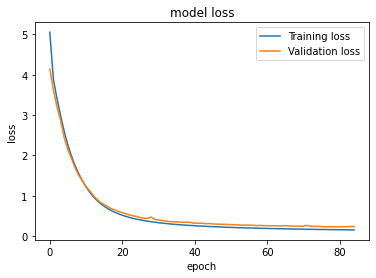

In [32]:
from matplotlib import pyplot as plt

# # 정확도 시각화
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
# plt.show()

# loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [33]:
# 인코딩 결과로 발생할 상태값도 가져오기 위해 그를 반환할 모델 (encoder_model)
encoder_model = Model(encoder_inputs, encoder_states)

encoder_h_state = Input(shape=(hidden_units,))
encoder_c_state = Input(shape=(hidden_units,))

# 디코더 설계 시작
# 이전 시점의 상태를 보관할 텐서
decoder_state_input_h = Input(shape=(hidden_units,))
decoder_state_input_c = Input(shape=(hidden_units,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# 훈련 때 사용했던 임베딩 층을 재사용
dec_emb2 = dec_emb_layer(decoder_inputs)

# 다음 단어 예측을 위해 이전 시점의 상태를 현 시점의 초기 상태로 사용
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]

# 모든 시점에 대해서 단어 예측
decoder_outputs2 = decoder_dense(decoder_outputs2)

# 수정된 디코더
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [34]:
# !pip install import_ipynb 

importing Jupyter notebook from seq_into_int_vectors.ipynb
7874
 
['-', 'start', 'end', 'Ap0001', 'Ap0002', 'Ap0003', 'Ap0004', 'Ap0005', 'Ap0006', 'Ap0007', 'Ap0008', 'Ap0009', 'Ap0010', 'Ap0011', 'Ap0012', 'Ap0013', 'Ap0014', 'Ap0015', 'Ap0016', 'Ap0017', 'Ap0018', 'Ap0019', 'Ag0001', 'Ag0002', 'Ag0003', 'Ag0004', 'Yx0001', 'Yx0002', 'Yx0003', 'Yx0004', 'Yx0005', 'Yx0006', 'Yx0007', 'Yx0008', 'Yx0009', 'Yx0010', 'Yx0011', 'Yx0012', 'Yx0013', 'Yx0014', 'Yx0015', 'Yx0016', 'Yx0017', 'Yx0018', 'Yx0019', 'Yx0020', 'Yx0021', 'Yx0022', 'Yx0023', 'Yx0024', 'Yx0025', 'Yx0026', 'Yx0027', 'Yx0028', 'Yx0029', 'Yx0030', 'Yx0031', 'Qx0001', 'Qx0002', 'Qx0003', 'Qx0004', 'Qx0005', 'Qx0006', 'Qx0007', 'Qx0008', 'Qx0009', 'Qx0010', 'Qx0011', 'Qx0012', 'Qx0013', 'Qx0014', 'Qx0015', 'Qx0016', 'Qx0017', 'Qx0018', 'Qx0019', 'Qx0020', 'Qx0021', 'Qx0022', 'Qx0023', 'Qx0024', 'Qx0025', 'Qx0026', 'Qx0027', 'Qx0028', 'Qx0029', 'Qx0030', 'Qx0031', 'Qx0032', 'Qx0033', 'Qx0034', 'Qx0035', 'Qx0036', 'Qx0037', 'Q

<string>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


96.67721063982746 76.0 1007


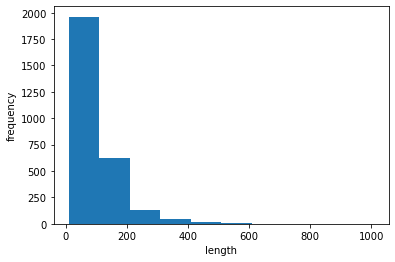

In [35]:
import import_ipynb
import seq_into_int_vectors as seqvec

In [36]:
print(seqvec.places_dict)

{'-': 1, 'start': 2, 'end': 3, 'Ap0001': 4, 'Ap0002': 5, 'Ap0003': 6, 'Ap0004': 7, 'Ap0005': 8, 'Ap0006': 9, 'Ap0007': 10, 'Ap0008': 11, 'Ap0009': 12, 'Ap0010': 13, 'Ap0011': 14, 'Ap0012': 15, 'Ap0013': 16, 'Ap0014': 17, 'Ap0015': 18, 'Ap0016': 19, 'Ap0017': 20, 'Ap0018': 21, 'Ap0019': 22, 'Ag0001': 23, 'Ag0002': 24, 'Ag0003': 25, 'Ag0004': 26, 'Yx0001': 27, 'Yx0002': 28, 'Yx0003': 29, 'Yx0004': 30, 'Yx0005': 31, 'Yx0006': 32, 'Yx0007': 33, 'Yx0008': 34, 'Yx0009': 35, 'Yx0010': 36, 'Yx0011': 37, 'Yx0012': 38, 'Yx0013': 39, 'Yx0014': 40, 'Yx0015': 41, 'Yx0016': 42, 'Yx0017': 43, 'Yx0018': 44, 'Yx0019': 45, 'Yx0020': 46, 'Yx0021': 47, 'Yx0022': 48, 'Yx0023': 49, 'Yx0024': 50, 'Yx0025': 51, 'Yx0026': 52, 'Yx0027': 53, 'Yx0028': 54, 'Yx0029': 55, 'Yx0030': 56, 'Yx0031': 57, 'Qx0001': 58, 'Qx0002': 59, 'Qx0003': 60, 'Qx0004': 61, 'Qx0005': 62, 'Qx0006': 63, 'Qx0007': 64, 'Qx0008': 65, 'Qx0009': 66, 'Qx0010': 67, 'Qx0011': 68, 'Qx0012': 69, 'Qx0013': 70, 'Qx0014': 71, 'Qx0015': 72, 'Qx0016':

In [37]:
inverse_places = {v: k for k, v in seqvec.places_dict.items()}
print(inverse_places)

{1: '-', 2: 'start', 3: 'end', 4: 'Ap0001', 5: 'Ap0002', 6: 'Ap0003', 7: 'Ap0004', 8: 'Ap0005', 9: 'Ap0006', 10: 'Ap0007', 11: 'Ap0008', 12: 'Ap0009', 13: 'Ap0010', 14: 'Ap0011', 15: 'Ap0012', 16: 'Ap0013', 17: 'Ap0014', 18: 'Ap0015', 19: 'Ap0016', 20: 'Ap0017', 21: 'Ap0018', 22: 'Ap0019', 23: 'Ag0001', 24: 'Ag0002', 25: 'Ag0003', 26: 'Ag0004', 27: 'Yx0001', 28: 'Yx0002', 29: 'Yx0003', 30: 'Yx0004', 31: 'Yx0005', 32: 'Yx0006', 33: 'Yx0007', 34: 'Yx0008', 35: 'Yx0009', 36: 'Yx0010', 37: 'Yx0011', 38: 'Yx0012', 39: 'Yx0013', 40: 'Yx0014', 41: 'Yx0015', 42: 'Yx0016', 43: 'Yx0017', 44: 'Yx0018', 45: 'Yx0019', 46: 'Yx0020', 47: 'Yx0021', 48: 'Yx0022', 49: 'Yx0023', 50: 'Yx0024', 51: 'Yx0025', 52: 'Yx0026', 53: 'Yx0027', 54: 'Yx0028', 55: 'Yx0029', 56: 'Yx0030', 57: 'Yx0031', 58: 'Qx0001', 59: 'Qx0002', 60: 'Qx0003', 61: 'Qx0004', 62: 'Qx0005', 63: 'Qx0006', 64: 'Qx0007', 65: 'Qx0008', 66: 'Qx0009', 67: 'Qx0010', 68: 'Qx0011', 69: 'Qx0012', 70: 'Qx0013', 71: 'Qx0014', 72: 'Qx0015', 73: 'Qx00

In [38]:
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 마지막 시점의 상태(은닉 상태, 셀 상태)를 얻음
    states_value = encoder_model.predict(input_seq)

  # <SOS>에 해당하는 정수 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = 2

    stop_condition = False
    decoded_sentence = []

  # stop_condition이 True가 될 때까지 루프 반복
  # 구현의 간소화를 위해서 이 함수는 배치 크기를 1로 가정합니다.
    while not stop_condition:
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_words, h, c = decoder_model.predict([target_seq] + states_value)

        # 예측 결과를 단어로 변환
        predicted_word = inverse_places[np.argmax(output_words[0,0])]
        # print(predicted_word)

        # 현재 시점의 예측 단어를 예측 문장에 추가
        decoded_sentence.append(predicted_word)

        # <eos>에 도달하거나 정해진 길이를 넘으면 중단.
        if (predicted_word == 'end' or
            len(decoded_sentence) >= 10):
            stop_condition = True

        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        predicted_seq = np.zeros((1,1))
        predicted_seq[0, 0] = np.argmax(output_words[0,0])

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

    return decoded_sentence

In [39]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_src(input_seq):
    sentence = []
    for encoded_word in input_seq:
        if(encoded_word != 0):
            sentence.append(inverse_places[encoded_word])
    return sentence

# 결과의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_tar(input_seq):
    sentence = []
    for encoded_word in input_seq:
        if(encoded_word != 0 and encoded_word != seqvec.places_dict['start'] and encoded_word != seqvec.places_dict['end']):
            sentence.append(inverse_places[encoded_word])
    return sentence

In [40]:
from collections import OrderedDict

encoder_input_less_repeat = []
decoder_input_less_repeat = []

for i in range(len(encoder_input_test)):
    trimmed = list(OrderedDict.fromkeys(encoder_input_test[i]))
    if len(trimmed) >= 3:
        encoder_input_less_repeat.append(i)   

print(encoder_input_less_repeat)
print(len(encoder_input_less_repeat))

[2, 8, 9, 20, 22, 25, 26, 28, 29, 33, 40, 41, 54, 58, 67, 68, 72, 81, 84, 85, 89, 93, 94, 98, 103, 104, 105, 106, 109, 115, 121, 124, 127, 133, 134, 135, 137, 139, 140, 141, 144, 146, 150, 153, 154, 160, 161, 165, 170, 171, 173, 176, 181, 183, 184, 185, 191, 195, 196, 199, 209, 214, 219, 220, 221, 223, 225, 226, 230, 232, 234, 239, 257, 263, 264, 267, 273, 274, 278, 279, 280, 286, 289, 295, 296, 299, 300, 303, 304, 305, 306, 307, 314, 316, 318, 319, 322, 331, 335, 337, 339, 348, 350, 361, 362, 363, 369, 375, 388, 389, 392, 397, 398, 400, 401, 402, 404, 405, 409, 411, 412, 415, 417, 420, 422, 424, 425, 427, 432, 433, 434, 436, 440, 446, 448, 450, 454, 457, 465, 466, 470, 480, 482, 484, 485, 499, 501, 502, 506, 513, 514, 516, 529, 545, 547, 548, 555, 556, 565, 571, 572, 578, 580, 589, 598, 604, 605, 608, 616, 621, 622, 623, 628, 629, 630, 631, 639, 640, 643, 646, 647, 650, 652, 653, 657, 658, 660, 661, 664, 665, 666, 667, 669, 670, 673, 683, 685, 695, 697, 699, 702, 703, 711, 713, 714, 7

In [41]:
len(encoder_input_test)

2550

In [42]:
def edit_dist(arr1, arr2):
    dp = [[0] * (len(arr2)+1) for _ in range(len(arr1) + 1)]
    for i in range(1, len(arr1)+1):
        dp[i][0] = i
    for j in range(1, len(arr2)+1):
        dp[0][j] = j

    for i in range(1, len(arr1)+1):
        for j in range(1, len(arr2)+1):
            if arr1[i-1] == arr2[j-1]:
                dp[i][j] = dp[i-1][j-1]

            else:
                dp[i][j] = min(dp[i-1][j-1], dp[i-1][j], dp[i][j-1]) + 1

    return dp[-1][-1]

In [43]:
# Mean Relatvie Error
def MRE(predicted_seq, target_seq):
    editDist = edit_dist(predicted_seq, target_seq)
    longerSeq = max(len(predicted_seq), len(target_seq))
    return editDist / longerSeq

In [44]:
# Mean accuracy
def MA(predicted_seq, target_seq):
    set1 = set(predicted_seq)
    set2 = set(target_seq)
    correctPredictNum = len(set1 & set2)
    
    return correctPredictNum / len(set1)

In [45]:
mre_list = []
ma_list = []
test_results = []

seq_indices =  encoder_input_less_repeat

for seq_index in seq_indices:
    input_seq = encoder_input_test[seq_index: seq_index + 1]
    # print(input_seq)
    decoded_sentence = decode_sequence(input_seq)
    
    inputstr = "입력 :" + str(seq_to_src(encoder_input_test[seq_index]))
    targetstr = "정답 :" + str(seq_to_tar(decoder_input_test[seq_index]))
    outputstr = "출력결과 :" + str(decoded_sentence)
    test_results.append([inputstr, targetstr, outputstr])

    print(inputstr)
    print(targetstr)
    print(outputstr)
    mre_list.append(MRE(decoded_sentence, seq_to_tar(decoder_input_test[seq_index])))
    ma_list.append(MA(decoded_sentence, seq_to_tar(decoder_input_test[seq_index])))
    print("-"*50)

입력 :['Sx0552', '-', '-', '-', '-', '-', '-', '-', 'Rx0662', 'Rx0662', '-', 'Rx0662', 'Rx0662', 'Rx0662', 'Rx0662']
정답 :['-', '-', '-', '-', 'Sx0552', 'Sx0552', 'Sx0552', 'Sx0552', 'Sx0552', 'Sx0552']
출력결과 :['Rx0662', 'Rx0662', 'Rx0662', 'Rx0662', 'Rx0662', 'Rx2676', 'Rx2676', 'Rx2676', 'Rx2676', 'Rx2676']
--------------------------------------------------
입력 :['-', '-', '-', 'Sx0014', 'Sx0014', 'Sx0014', 'Sx0014', '-', '-', '-', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734']
정답 :['Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734']
출력결과 :['Sx0734', 'Sx0734', 'Sx0734', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0734', 'Lx0397', 'Lx0397']
--------------------------------------------------
입력 :['Rx2704', '-', '-', 'Rx2705', 'Rx2705', 'Rx2705', 'Rx2705', '-', '-', '-', '-', '-', '-', '-', '-']
정답 :['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
출력결과 :['-', '-', 'Rx2676', 'Kx0080', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2676', 'Rx2676

입력 :['Rx2474', 'Rx2474', 'Rx2474', 'Rx2474', '-', '-', '-', '-', '-', '-', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586']
정답 :['Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586']
출력결과 :['Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx2474', 'Hc0022']
--------------------------------------------------
입력 :['Sx1551', 'Sx1551', 'Sx1551', '-', '-', '-', 'Xx0022', 'Xx0022', 'Xx0022', 'Xx0022', 'Xx0022', 'Xx0022', 'Xx0022', 'Xx0022', '-']
정답 :['-', '-', '-', '-', '-', '-', 'Tx0146', 'Tx0146', '-', '-']
출력결과 :['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
입력 :['-', '-', '-', '-', '-', 'Rx0323', 'Rx0323', '-', '-', '-', 'Rx0510', 'Rx0510', 'Rx0510', 'Rx0510', 'Rx0510']
정답 :['Rx0510', '-', '-', '-', '-', '-', '-', '-', 'Sx0472', 'Sx0472']
출력결과 :['-', 'Rx0510', 'Lx0022', 'Rx2619', 'Lx0362', 'Lx0362', 'Lx0362', 'end']
----------------------------------------

입력 :['Sx0500', 'Sx0500', 'Sx0500', 'Sx0500', 'Sx0500', 'Sx0500', 'Sx0500', 'Sx0500', 'Sx0500', 'Hc0054', 'Hc0054', 'Hc0054', '-', '-', '-']
정답 :['Sx1494', 'Sx1494', 'Sx1494', 'Sx1494', 'Sx1494', 'Sx1494', '-', '-', '-', '-']
출력결과 :['-', 'Sx1494', 'Sx1494', 'Sx1494', 'Bs0227', 'Bs0227', 'Bs0227', 'Bs0227', 'Ux0227', 'Ux0227']
--------------------------------------------------
입력 :['-', '-', '-', 'Rx2659', '-', '-', '-', '-', 'Rx2658', 'Rx2658', 'Rx2658', 'Rx2658', 'Rx2658', 'Rx2658', 'Rx2658']
정답 :['Rx2658', 'Rx2658', 'Rx2658', 'Rx2658', 'Rx2658', 'Rx2658', 'Rx2658', 'Rx2658', 'Rx2658', 'Rx2658']
출력결과 :['Rx2658', 'Rx2658', 'Rx2658', 'Rx2658', 'Rx2658', '-', 'Rx0865', 'Rx0865', 'Rx0865', '-']
--------------------------------------------------
입력 :['-', '-', '-', 'Sx2173', 'Rx2564', 'Rx2564', 'Rx2564', 'Rx2564', '-', '-', 'Rx2565', 'Rx2565', 'Rx2565', 'Rx2565', 'Rx2565']
정답 :['Rx2565', 'Rx2565', '-', '-', '-', '-', '-', '-', '-', 'Ta0113']
출력결과 :['Rx2565', 'Rx2565', 'Rx2565', 'Rx2565', 'R

입력 :['-', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', '-', '-', '-', '-', '-', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004']
정답 :['Ux0004', 'Ux0004', 'Ux0004', '-', '-', '-', 'Rx0184', 'Rx0184', '-', 'Rx0026']
출력결과 :['Ux0004', 'Sx0042', 'Sx0042', 'Sx0804', 'Rx1009', 'Rx0313', 'Rx0313', 'Rx0313', 'Rx0313', 'Lx0092']
--------------------------------------------------
입력 :['Sx0973', 'Sx0973', 'Sx0973', 'Sx0973', 'Sx0973', '-', '-', '-', '-', 'Rx1191', '-', '-', '-', '-', '-']
정답 :['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
출력결과 :['-', 'Rx2633', 'Rx2633', 'Rx2676', 'Rx2676', 'Sx0874', 'Sx0874', 'Sx0874', 'Sx0874', 'Sx0874']
--------------------------------------------------
입력 :['Sx1936', '-', '-', 'Sx1936', 'Sx1936', 'Sx1936', '-', '-', 'Sx2094', 'Sx2094', 'Sx2094', 'Sx2094', 'Sx2094', 'Sx2094', 'Sx2094']
정답 :['Sx2094', 'Sx2094', 'Sx2094', '-', '-', '-', 'Sx1936', 'Sx1936', 'Sx1936', 'Sx1936']
출력결과 :['Sx2094', 'Sx2094', 'Sx2094', 'Sx2094', 'Sx2094', 'Sx2094', 'Sx2094', 'Sx2094', 'R

입력 :['Rx0239', '-', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004']
정답 :['Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004']
출력결과 :['Ux0004', 'Ux0004', 'St0001', 'St0001', 'St0001', 'Rx1009', 'Sx0020', 'Sx0020', 'Sx0020', 'Sx0020']
--------------------------------------------------
입력 :['-', 'Rx0029', 'Rx0029', '-', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406']
정답 :['Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406']
출력결과 :['Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Sx0406', 'Rx1261', 'Rx1261']
--------------------------------------------------
입력 :['-', 'Rx0003', '-', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004']
정답 :['Ux0004', 'Ux0004', 'Ux0004',

입력 :['Rx2168', 'Rx2168', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'Sx1874', 'Sx1874', 'Sx1874']
정답 :['Sx1874', 'Sx1874', 'Sx1874', 'Sx1874', 'Sx1874', 'Sx1874', 'Sx1874', 'Sx1874', 'Sx1874', 'Sx1874']
출력결과 :['Sx1874', 'Sx1874', 'Sx1874', 'Rx1008', 'Rx2839', 'Rx2839', 'Sx1920', 'Rx1853', 'Rx1853', 'Rx1853']
--------------------------------------------------
입력 :['-', '-', 'Rx0634', 'Rx0634', '-', '-', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129']
정답 :['Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129']
출력결과 :['Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0129', 'Lx0375', 'Lx0375', 'Lx0375', 'Lx0375']
--------------------------------------------------
입력 :['Rx2084', '-', '-', '-', '-', '-', '-', 'Rx1709', 'Rx1709', 'Rx1709', 'Rx1709', 'Rx1709', 'Rx1709', 'Rx1709', 'Rx1709']
정답 :['Rx1709', 'Rx1709', 'Rx1709', 'Rx1709', 'Rx1709', 'Rx1709', 'Rx1709', 'Rx1709', 'Rx1709', 'Rx1709']
출력결과

입력 :['-', '-', '-', 'Sx0305', 'Sx0305', '-', '-', '-', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108']
정답 :['Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108']
출력결과 :['Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', 'Sx0312', 'Sx0822', 'Sx0822', 'Sx0822']
--------------------------------------------------
입력 :['Rx0417', 'Rx0417', 'Rx0417', 'Rx0417', 'Rx0417', 'Rx0417', 'Rx0417', 'Rx0417', 'Rx0417', 'Rx0417', 'Rx0417', 'Sx1019', '-', '-', '-']
정답 :['Xx0013', 'Xx0013', 'Xx0013', 'Xx0013', 'Xx0013', 'Xx0013', 'Xx0013', 'Xx0013', 'Xx0013', 'Xx0013']
출력결과 :['-', 'Xx0013', 'Bs0012', 'Sx0020', 'St0001', 'St0001', 'Sx0060', 'Sx0060', 'Sx0060', 'Sx0060']
--------------------------------------------------
입력 :['Sx0156', '-', 'Rx0353', 'Rx0353', 'Rx0353', 'Rx0353', 'Rx0353', 'Rx0353', '-', 'Sx0280', 'Sx0280', 'Sx0280', 'Sx0280', 'Sx0280', 'Sx0280']
정답 :['Sx0280', 'Sx0280', '-', '-', '-', '-', '-', '-', '-', '-']
출력결과

입력 :['Rx2134', 'Rx2134', 'Rx2134', 'Rx2134', 'Rx2134', 'Rx2134', 'Rx2134', 'Rx2134', 'Rx2134', '-', '-', 'Sx0921', '-', 'Rx0692', 'Rx0692']
정답 :['Rx0692', 'Rx0692', 'Rx0692', 'Rx0692', 'Rx0692', 'Rx0692', 'Rx0692', 'Rx0692', 'Rx0692', 'Rx0692']
출력결과 :['Rx0692', 'Rx0692', 'Rx0692', 'Rx0692', 'Rx0692', 'Rx2620', 'Rx1320', 'Rx1320', 'Rx1320', 'Rx1320']
--------------------------------------------------
입력 :['-', '-', '-', 'Rx1106', '-', '-', '-', '-', '-', '-', '-', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0623']
정답 :['Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0510', 'Rx0510', 'Rx0510', 'Rx0510']
출력결과 :['Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290']
--------------------------------------------------
입력 :['Sx1617', 'Sx1617', 'Sx1617', '-', '-', '-', 'Sx0928', '-', '-', '-', '-', '-', '-', '-', '-']
정답 :['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
출력결과 :['-', 'Tx0234', 'Sx0823', 'Rx0239', 'Rx0239', '-', 'Mx0031', 'Sx2474

입력 :['Sx0903', 'Sx0903', 'Sx0903', 'Sx0903', 'Sx0903', 'Sx0903', '-', '-', '-', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004']
정답 :['Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', '-']
출력결과 :['Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Sx0036', 'Sx0036', 'Sx0036', 'Sx0036', 'Rx0313', 'Sx0036']
--------------------------------------------------
입력 :['Sx1383', 'Sx1383', 'Sx1383', 'Sx1383', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'Ux0024']
정답 :['Ux0024', 'Ux0024', 'Ux0024', 'Ux0024', 'Ux0024', 'Ux0024', 'Ux0024', 'Ux0024', 'Ux0024', 'Ux0024']
출력결과 :['Ux0024', 'Tx0135', 'Tx0135', 'Lx0092', 'Sx0036', 'Sx0036', 'Sx0036', 'Sx0036', 'Rx0239', 'Sx0036']
--------------------------------------------------
입력 :['Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Rx0618', 'Sx0065', 'Sx0065']
정답 :['Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0

입력 :['-', '-', '-', 'St0001', 'St0001', 'St0001', 'St0001', 'St0001', 'St0001', '-', '-', '-', '-', 'Ux0037', 'Ux0037']
정답 :['Ux0037', 'Ux0037', 'Ux0037', 'Ux0037', '-', '-', '-', 'Ux0004', 'Ux0004', 'Ux0004']
출력결과 :['Ux0037', 'Ux0037', 'Sx0042', 'Rx0313', 'Rx0313', 'Rx0313', 'Rx0313', 'Rx0313', 'Rx0313', 'Lx0092']
--------------------------------------------------
입력 :['Rx0323', 'Rx0323', 'Rx0323', 'Rx0323', '-', '-', '-', '-', '-', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324']
정답 :['Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324']
출력결과 :['Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324', 'Rx0324']
--------------------------------------------------
입력 :['Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', '-', '-', '-', '-', '-', '-', 'Bs0012', 'Bs0012', 'Bs0012', 'Bs0012']
정답 :['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
출력결과 :['Bs0012', '-', '-', '-', '-', '-', '-', '-', '-', '-

입력 :['Ux0007', 'Ux0007', 'Ux0007', 'Ux0007', 'Ux0007', 'Ux0007', 'Kx0004', 'Kx0004', 'Kx0004', 'Kx0004', 'Kx0004', 'Kx0004', 'Kx0004', 'Kx0004', '-']
정답 :['-', '-', 'Kx0004', 'Kx0004', '-', '-', 'Ux0007', 'Ux0007', 'Ux0007', 'Ux0007']
출력결과 :['-', 'Kx0004', 'Kx0004', 'Kx0004', 'Kx0004', 'Kx0004', 'Rx0402', 'Sx2474', 'Sx2474', '-']
--------------------------------------------------
입력 :['-', '-', 'Rx1470', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1261']
정답 :['Sx1261', 'Sx1261', '-', '-', '-', '-', '-', '-', 'Sx1261', 'Sx1261']
출력결과 :['Sx1261', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1261', 'Sx1262', 'Sx1262', 'Sx1262']
--------------------------------------------------
입력 :['Ux0114', 'Ux0114', 'Ux0114', '-', '-', '-', '-', '-', '-', '-', 'Ux0207', 'Ux0207', 'Ux0207', 'Ux0207', 'Ux0207']
정답 :['Ux0207', 'Ux0207', '-', '-', '-', '-', 'St0051', 'St0051', 'St0051', 'St0051']
출력결과 :['Ux0207', 'Ux0207', 'Sx1874

입력 :['-', '-', '-', '-', '-', '-', '-', 'Sx0483', '-', '-', '-', '-', 'Lx0120', 'Lx0120', 'Lx0120']
정답 :['Lx0120', 'Lx0120', 'Lx0120', 'Lx0120', 'Lx0120', 'Lx0120', 'Lx0120', 'Lx0120', 'Lx0120', 'Lx0120']
출력결과 :['Lx0120', 'Lx0120', 'Lx0120', 'Lx0120', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004']
--------------------------------------------------
입력 :['Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', '-', '-', 'Ux0006', 'Ux0006', '-', '-', '-', '-', '-', '-', '-']
정답 :['-', '-', '-', '-', '-', 'Lx0073', 'Lx0073', 'Lx0073', 'Lx0073', 'Lx0073']
출력결과 :['-', 'Lx0073', 'Kx0080', 'Kx0080', 'Kx0080', 'Kx0080', 'Kx0080', 'Kx0080', 'Kx0080', 'Kx0080']
--------------------------------------------------
입력 :['Rx1257', 'Rx1257', 'Rx2492', 'Rx2492', 'Rx2492', 'Rx2492', 'Rx2492', 'Rx2492', 'Rx2492', 'Rx2492', 'Rx2492', 'Rx2492', 'Rx2492', '-', '-']
정답 :['-', '-', 'Sx0508', 'Sx0508', 'Sx0508', 'Sx0508', 'Sx0508', 'Sx0508', 'Sx0508', 'Sx0508']
출력결과 :['-', '-', 'Sx0508', 'Sx0508', 'Sx0508', 'Sx0508

입력 :['Lx0073', 'Lx0073', 'Lx0073', 'Lx0073', 'Lx0073', '-', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306']
정답 :['Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306']
출력결과 :['Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', 'Sx0306', '-', '-', '-', 'Rx0865', 'Rx0865']
--------------------------------------------------
입력 :['Sx0014', '-', '-', '-', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734']
정답 :['Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734']
출력결과 :['Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734', 'Sx0734']
--------------------------------------------------
입력 :['Sx0165', '-', 'Bs0009', 'Bs0009', 'Bs0009', 'Bs0009', 'Bs0009', 'Bs0009', 'Bs0009', 'Bs0009', 'Bs0009', 'Bs0009', 'Bs0009', 'Bs0009', 'Bs0009']
정답 :['Bs0009', 'Bs0009', 'Bs0009', 'Bs0009', 'Bs0

입력 :['Sx0112', 'Sx0112', 'Sx0112', '-', '-', '-', '-', 'Sm0003', 'Sm0003', 'Sm0003', '-', '-', '-', '-', 'Tx0004']
정답 :['Tx0004', 'Tx0004', 'Tx0004', 'Tx0004', 'Tx0004', 'Tx0004', 'Tx0004', 'Tx0004', 'Tx0004', 'Tx0004']
출력결과 :['Tx0004', 'Tx0004', 'Tx0004', 'Tx0004', 'Tx0004', 'Tx0004', 'Tx0004', 'Tx0004', 'Sx2045', 'Sx2045']
--------------------------------------------------
입력 :['Rx2660', 'Rx2660', 'Rx2660', 'Rx2660', 'Rx2660', 'Rx2660', 'Rx2660', 'Rx2660', 'Rx2660', 'Rx2660', '-', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661']
정답 :['Rx2661', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661']
출력결과 :['Rx2661', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661', 'Rx2661']
--------------------------------------------------
입력 :['-', 'Sx0795', 'Sx0795', 'Sx0795', '-', '-', '-', '-', 'Rx1035', 'Rx1035', '-', '-', '-', '-', '-']
정답 :['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
출력결과 :['-', '-', 'Qx0034', 'Qx0034', 'Rx0578', 'R

입력 :['-', '-', 'Lx0022', 'Lx0022', 'Lx0022', '-', 'Rx0104', 'Rx0104', 'Rx0104', 'Rx0104', 'Rx0104', 'Rx0104', 'Rx0104', 'Rx0104', '-']
정답 :['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
출력결과 :['-', '-', '-', '-', 'Ux0004', 'Ux0004', '-', '-', '-', '-']
--------------------------------------------------
입력 :['Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Bs0030', 'Rx0618', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065']
정답 :['Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065']
출력결과 :['Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx0065', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313']
--------------------------------------------------
입력 :['Rx0150', 'Rx0150', '-', 'Rx0145', 'Rx0145', '-', 'Tg0005', 'Tg0005', 'Tg0005', 'Tg0005', 'Tg0005', 'Tg0005', 'Tg0005', 'Tg0005', 'Tg0005']
정답 :['Tg0005', 'Tg0005', 'Tg0005', 'Tg0005', 'Tg0005', 'Tg0005', 'Tg0005', 'Tg0005', 'Tg0005', 'Tg0005']
출력결과 :['Tg0005', 'Tg0005

입력 :['Bs0169', '-', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085']
정답 :['Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085']
출력결과 :['Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085', 'Sx1085']
--------------------------------------------------
입력 :['Ux0004', 'Ux0004', 'Ux0004', '-', '-', '-', 'Cx0001', 'Cx0001', '-', '-', '-', '-', '-', '-', '-']
정답 :['-', '-', '-', '-', '-', '-', '-', '-', 'Lx0005', '-']
출력결과 :['-', 'Bs0351', 'Rx0021', 'Rx0394', 'Tx0024', 'Tx0024', 'Tx0024', 'Tx0024', 'Tx0024', '-']
--------------------------------------------------
입력 :['Lx0273', 'Lx0273', 'Lx0273', '-', '-', '-', 'Qx0047', 'Qx0047', 'Qx0047', 'Qx0047', 'Qx0047', 'Qx0047', 'Qx0047', 'Qx0047', 'Qx0047']
정답 :['Qx0047', 'Qx0047', 'Rx1653', 'Rx1653', 'Rx1653', 'Rx1653', '-', 'Kx0060', 'Kx0060', 'Kx0060']
출력결과 :['Qx0047', 'Qx0047', 'Rx1653

입력 :['Rx2875', 'Rx2875', 'Rx2875', 'Bs0374', 'Bs0374', 'Bs0374', '-', '-', '-', '-', '-', '-', '-', 'Sx2293', 'Sx2293']
정답 :['Sx2293', 'Sx2293', 'Sx2293', '-', '-', '-', '-', '-', '-', '-']
출력결과 :['Sx2293', 'Sx2293', 'Sx2293', 'Sx1626', 'Sx1626', 'Rx2190', 'Sx2177', 'Sx2177', 'Sx2177', 'Rx1853']
--------------------------------------------------
입력 :['Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', '-', '-', 'Rx0623', 'Rx0623']
정답 :['Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0623']
출력결과 :['Rx0623', 'Rx0623', 'Rx0619', 'Rx0149', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
입력 :['Qx0047', 'Qx0047', 'Qx0047', 'Qx0047', 'Rx1653', 'Rx1653', 'Rx1653', 'Rx1653', '-', 'Kx0060', 'Kx0060', 'Kx0060', 'Kx0060', 'Kx0060', 'Kx0060']
정답 :['Kx0060', 'Kx0060', 'Kx0060', 'Kx0060', 'Kx0060', 'Kx0060', 'Kx0060', 'Kx0060', 'Kx0060', 'Kx0060']
출력결과 :['Kx0060', 'K

입력 :['-', '-', '-', '-', '-', '-', '-', '-', '-', 'Rx0818', 'Rx0818', '-', '-', 'Kx0028', 'Kx0028']
정답 :['Kx0028', 'Kx0028', 'Kx0028', 'Kx0028', 'Kx0028', 'Kx0028', 'Kx0028', 'Kx0028', '-', 'Ta0054']
출력결과 :['Kx0028', 'Kx0028', 'Kx0028', 'Ux0004', 'Sx0036', 'Sx0036', 'Sx0036', 'Sx0036', 'Sx0036', 'Sx0036']
--------------------------------------------------
입력 :['Rx0040', 'Sx0018', 'Sx0018', 'Sx0018', 'Sx0018', 'Sx0018', 'Sx0018', 'Sx0018', 'Sx0018', 'Sx0018', 'Sx0018', 'Sx0018', 'Sx0018', '-', '-']
정답 :['-', '-', 'Rx0048', 'Rx0048', 'Rx0048', 'Rx0048', 'Rx0048', 'Rx0048', 'Rx0048', 'Rx0048']
출력결과 :['-', 'Rx0048', 'Rx0048', 'Rx0048', 'Rx0048', 'Sx0328', 'Rx0749', 'Rx0749', 'Rx0749', 'Rx0749']
--------------------------------------------------
입력 :['Rx0730', 'Rx0730', 'Rx0730', 'Rx0730', 'Rx0730', 'Rx0730', 'Rx0730', '-', '-', '-', '-', 'Rx0676', 'Rx0676', '-', 'Rx0761']
정답 :['Rx0761', 'Rx0761', 'Rx0761', 'Rx0761', 'Rx0761', 'Rx0761', 'Rx0761', 'Rx0761', 'Rx0761', '-']
출력결과 :['Rx0761', 'R

입력 :['-', 'Rx1890', '-', '-', '-', 'Rx1980', 'Rx1980', '-', '-', 'Rx1980', 'Rx1980', '-', '-', '-', 'Rx1718']
정답 :['Rx1718', 'Rx1718', '-', '-', 'Rx1718', 'Rx1718', 'Rx1718', 'Rx1718', 'Rx1718', 'Rx1718']
출력결과 :['Rx1718', 'Rx1718', 'Rx1718', 'Rx1718', 'Rx1718', 'Rx2441', 'Rx2441', 'Rx2441', 'Sx2474', 'Sx2474']
--------------------------------------------------
입력 :['Lx0092', '-', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368']
정답 :['Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368', 'Sx1368']
출력결과 :['Sx1368', 'Sx1368', 'Sx1368', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
입력 :['Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', '-', 'Sx0042', 'Sx0042', 'Sx0042', 'Sx0042', 'Sx0042', 'Sx0042', 'Sx0042', 'Sx0042', 'Sx0042', 'Sx0042']
정답 :['Sx0042', 'Sx0042', 'Sx0042', 'Sx0042', '-', 'Ux0037', 'Ux0037', 'Ux0037', 'Ux0037', 'Ux0037']
출력결과 :['S

입력 :['Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', '-', '-', 'Ux0006', 'Ux0006', '-', '-', '-', '-']
정답 :['-', '-', '-', '-', '-', '-', '-', '-', 'Lx0073', 'Lx0073']
출력결과 :['-', 'Sx1621', 'Sx0342', 'Rx0239', 'Rx0239', 'Rx0239', 'Rx0239', 'Rx0239', 'Rx2633', 'Rx2633']
--------------------------------------------------
입력 :['Sx0194', 'Sx0194', 'Sx0194', 'Sx0194', 'Sx0194', 'Sx0194', 'Sx0194', 'Rx0020', 'Rx0020', '-', '-', 'Rx0020', 'Rx0020', 'Rx0020', 'Rx0020']
정답 :['Rx0020', 'Rx0020', 'Rx0020', 'Rx0020', 'Rx0020', 'Rx0020', 'Rx0020', '-', '-', '-']
출력결과 :['Rx0020', 'Rx0020', 'Rx0020', 'Rx0020', 'Rx0020', 'Rx0020', 'Rx1470', 'Rx1470', 'Rx1470', 'Rx1470']
--------------------------------------------------
입력 :['Ux0168', '-', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865']
정답 :['Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865']
출력결과 :['R

입력 :['Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', '-', '-', '-', '-', '-', '-', '-', 'Rx1379', 'Rx1379', '-', 'Rx1354']
정답 :['Rx1354', 'Rx1354', '-', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865', 'Rx0865']
출력결과 :['Rx1354', 'Sx1104', 'Sx1104', 'Bs0354', 'Bs0354', 'Bs0354', 'Bs0354', 'Bs0354', 'Bs0354', 'Bs0354']
--------------------------------------------------
입력 :['Ag0001', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005']
정답 :['Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005']
출력결과 :['Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Rx0578', 'Rx0578', 'Rx0578', 'Rx0578']
--------------------------------------------------
입력 :['-', '-', 'Rx2162', 'Rx2041', '-', '-', '-', 'Rx0563', 'Rx0563', 'Rx0563', 'Rx0563', 'Rx0563', 'Rx0563', 'Rx0563', 'Rx0563']
정답 :['Rx0563', 'Rx0563', 'Rx0563', 'Rx1672', '-', '-', '-', '-', '-', '-']
출력결과 :['Rx0563', 'Rx0563', 'Rx0563', 'Rx0563', 'end']


입력 :['-', '-', 'Sx0090', '-', '-', '-', '-', 'Bs0087', '-', '-', '-', '-', '-', '-', '-']
정답 :['-', 'Rx0706', 'Rx0706', 'Rx0706', 'Rx0706', '-', '-', '-', '-', '-']
출력결과 :['-', 'Rx0606', 'Rx0865', 'Rx0455', 'Rx0455', 'Rx0455', 'Rx1185', 'Rx1185', 'Rx1185', 'Kx0030']
--------------------------------------------------
입력 :['-', 'Lx0541', 'Lx0541', 'Lx0541', 'Lx0541', 'Lx0541', 'Lx0541', 'Lx0541', 'Lx0541', 'Lx0541', 'Lx0541', '-', 'Sx2427', 'Sx2427', 'Sx2427']
정답 :['Sx2427', 'Sx2427', 'Sx2427', 'Sx2427', 'Sx2427', 'Sx2427', 'Sx2427', 'Sx2427', 'Sx2427', 'Sx2427']
출력결과 :['Sx2427', 'Sx2427', 'Rx0004', 'Sx0036', 'Sx0036', 'Sx0036', 'Sx0036', 'Sx0036', 'Sx0036', 'Sx0036']
--------------------------------------------------
입력 :['Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', '-', 'Sx0098', 'Sx0098', 'Sx0098', 'Sx0098']
정답 :['Sx0098', 'Sx0098', 'Sx0098', 'Sx0098', 'Sx0098', 'Sx0098', '-', '-', '-', 'Rx0120']
출력결과 :['Sx0098', 'Sx0098', 'Sx0098

입력 :['Sx2321', 'Sx2321', 'Sx2321', '-', '-', '-', 'Lx0537', 'Lx0537', 'Lx0537', 'Lx0537', 'Lx0537', 'Lx0537', '-', '-', '-']
정답 :['-', '-', 'Sx0244', 'Sx0244', 'Sx0244', 'Sx0244', 'Sx0244', 'Sx0244', 'Sx0244', 'Sx0244']
출력결과 :['-', 'Sx0244', 'Rx2124', 'Rx1320', 'Rx1320', 'Lx0362', 'Lx0362', 'Lx0362', 'Lx0362', 'Lx0362']
--------------------------------------------------
입력 :['Ux0041', 'Ux0041', 'Ux0041', 'Ux0041', '-', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', '-', '-', 'Rx0409', 'Rx0409']
정답 :['Rx0409', 'Rx0409', 'Rx0409', 'Rx0409', 'Rx0409', 'Rx0409', 'Rx0409', 'Rx0409', 'Rx0409', 'Rx0409']
출력결과 :['Rx0409', 'Rx0409', 'Rx0409', 'Rx0409', 'Xx0021', 'Xx0021', 'Ux0004', 'Ux0004', 'Ux0004', 'Sx1294']
--------------------------------------------------
입력 :['-', '-', '-', '-', 'Sx1328', '-', '-', '-', '-', '-', '-', '-', '-', 'Tx0129', '-']
정답 :['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
출력결과 :['-', 'Rx2633', 'Rx1718', 'Rx1718', 'Rx1718', 'Rx1718', 'Rx1718', 'Rx1718

입력 :['Sx1974', 'Sx1974', '-', '-', 'Hc0073', 'Hc0073', '-', '-', 'Sx1973', 'Sx1973', 'Sx1973', 'Sx1973', 'Sx1973', 'Sx1973', 'Sx1973']
정답 :['Sx1973', 'Sx1973', 'Sx1973', 'Sx1973', 'Sx1973', '-', '-', '-', '-', '-']
출력결과 :['Sx1973', 'Sx1973', 'Tx0107', 'Ch0001', 'Ch0001', 'Rx0793', 'Rx0793', 'Rx0793', 'Rx0793', 'Rx1320']
--------------------------------------------------
입력 :['Rx0862', 'Rx0862', 'Rx0862', '-', '-', '-', '-', 'Tx0161', '-', '-', 'Tx0052', 'Tx0052', 'Tx0052', 'Tx0052', 'Tx0052']
정답 :['Tx0052', 'Tx0052', 'Tx0052', 'Tx0052', 'Tx0052', '-', '-', '-', '-', '-']
출력결과 :['Tx0052', 'Tx0052', 'Tx0052', 'Rx0183', 'Sx1626', 'Sx1626', 'Sx0558', 'Sx0558', 'Sx0558', 'Sx0558']
--------------------------------------------------
입력 :['-', '-', '-', 'Lx0046', '-', '-', '-', '-', 'Rx0334', '-', '-', '-', '-', '-', '-']
정답 :['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
출력결과 :['-', 'Rx0083', 'Rx0021', 'Rx0021', 'Rx0239', 'Rx0239', 'Rx0239', 'Sx2474', 'Sx2474', '-']
----------------------

입력 :['Lx0291', 'Lx0291', 'Lx0291', '-', '-', '-', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313']
정답 :['Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313']
출력결과 :['Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313', 'Sx1313']
--------------------------------------------------
입력 :['Sx0115', 'Sx0115', 'Sx0115', 'Sx0115', 'Sx0115', 'Sx0115', 'Sx0115', 'Sx0115', '-', '-', '-', '-', 'Rx0136', '-', '-']
정답 :['-', 'Sx0087', '-', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', '-', '-', '-']
출력결과 :['-', 'Sx0087', 'Tg0001', 'Rx1009', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367']
--------------------------------------------------
입력 :['Sx0508', 'Sx0508', 'Sx0508', 'Sx0508', 'Sx0508', 'Sx0508', 'Sx0508', 'Sx0508', 'Sx0508', '-', 'Lx0148', 'Lx0148', 'Lx0148', 'Lx0148', 'Lx0148']
정답 :['Lx0148', 'Lx0148', 'Lx0148', 'Lx0148', 'Lx0148', 'Lx0148', 'Lx0148', '-', '-', '-']

입력 :['-', 'Rx2322', '-', '-', '-', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367']
정답 :['Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367']
출력결과 :['Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367', 'Rx2367']
--------------------------------------------------
입력 :['-', '-', '-', 'Rx1154', 'Rx1154', 'Rx1154', 'Rx1154', 'Rx1154', 'Rx1154', 'Rx1154', 'Rx1154', 'Rx1149', '-', '-', '-']
정답 :['-', '-', '-', '-', '-', '-', 'Sx0016', 'Sx0016', 'Sx0016', 'Sx0016']
출력결과 :['-', 'Ux0289', 'Sx0115', 'Lx0092', 'Rx0183', 'Rx0183', 'Rx0183', 'Sx0036', 'Sx0036', 'Sx0182']
--------------------------------------------------
입력 :['-', 'Lx0136', 'Lx0136', '-', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683']
정답 :['Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683', 'Rx0683']

입력 :['-', '-', '-', '-', '-', 'Sx1366', '-', 'Rx1577', 'Rx1577', '-', 'Rx1577', 'Rx1577', 'Rx1577', 'Rx1577', 'Rx1577']
정답 :['Rx1577', 'Rx1577', 'Rx1577', 'Rx1577', 'Rx1577', 'Rx1577', 'Rx1577', 'Rx1577', 'Rx1577', 'Rx1577']
출력결과 :['Rx1577', 'Rx1577', 'Rx1577', 'Rx1577', 'Rx1577', 'Rx1577', 'Ux0041', 'Ux0041', 'St0042', 'St0042']
--------------------------------------------------
입력 :['-', '-', 'Rx1473', '-', '-', 'Rx1474', 'Rx1474', '-', '-', '-', '-', '-', '-', '-', '-']
정답 :['-', '-', '-', '-', '-', '-', 'Sx1263', '-', '-', '-']
출력결과 :['-', 'Rx0021', 'Bs0192', 'Rx0021', 'Hc0022', '-', '-', '-', '-', '-']
--------------------------------------------------
입력 :['-', '-', '-', '-', '-', '-', 'Rx0818', '-', 'Rx2090', 'Rx2090', 'Rx2090', 'Rx2090', 'Rx2090', 'Rx2090', 'Rx2090']
정답 :['Rx2090', '-', '-', '-', 'Rx0439', '-', 'Rx0877', '-', '-', '-']
출력결과 :['-', '-', '-', 'end']
--------------------------------------------------
입력 :['-', '-', '-', '-', 'Lx0507', 'Lx0507', '-', 'Sm0051', 'Sm0

입력 :['Tx0044', 'Tx0044', 'Tx0044', 'Tx0044', '-', '-', '-', 'Ux0115', 'Ux0115', 'Ux0115', 'Ux0115', 'Ux0115', 'Ux0115', '-', 'Rx0590']
정답 :['Rx0590', 'Rx0590', 'Rx0590', 'Rx0590', 'Rx0590', 'Rx0590', 'Rx0590', 'Rx0590', 'Rx0590', 'Rx0590']
출력결과 :['Rx0590', 'Rx0590', 'Rx0590', 'Ux0115', 'Ux0115', 'Ux0115', 'Ux0115', 'Ux0115', 'Rx1709', 'Lx0375']
--------------------------------------------------
입력 :['Sx0001', '-', 'Sx0359', 'Sx0359', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045']
정답 :['Sx0045', '-', '-', '-', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001']
출력결과 :['Sx0045', 'Sx0045', 'Ux0060', 'Ux0060', 'Ux0060', 'Ux0060', 'St0004', 'St0004', 'St0004', 'St0004']
--------------------------------------------------
입력 :['-', '-', '-', 'Rx0072', 'Rx0029', 'Rx0029', 'Rx0029', 'Rx0029', 'Rx0029', 'Rx0029', 'Rx0029', 'Rx0029', 'Rx0029', 'Rx0029', 'Rx0029']
정답 :['Rx0029', 'Rx0029', 'Rx0029', '-', '-', '-', '-', '-', '-',

입력 :['Sx0454', 'Sx0454', 'Sx0454', 'Sx0454', '-', '-', '-', '-', '-', '-', '-', 'Ux0008', '-', '-', 'Sx0048']
정답 :['Sx0048', 'Sx0048', 'Sx0048', 'Sx0048', 'Sx0048', 'Bs0037', 'Bs0037', 'Bs0037', 'Bs0037', 'Bs0037']
출력결과 :['Sx0048', 'Sx0048', 'Sx0048', 'Sx0048', 'Sx0048', 'Sx0048', 'Lx0201', 'Lx0201', 'Lx0201', 'Rx0313']
--------------------------------------------------
입력 :['Ux0178', 'Ux0178', 'Ux0178', 'Ux0178', '-', '-', '-', '-', 'Rx1458', 'Rx1458', 'Rx1458', 'Rx1458', 'Rx1458', 'Rx1458', 'Rx1458']
정답 :['Rx1458', 'Rx1458', 'Rx1458', 'Rx1458', 'Rx1458', 'Rx1458', '-', '-', '-', '-']
출력결과 :['Rx1458', 'Rx1458', 'Rx1458', 'Rx1458', 'Rx1458', 'Rx1458', 'Sx1894', 'Sx1894', 'Sx1894', 'Sx1894']
--------------------------------------------------
입력 :['Rx1568', 'Rx1568', 'Rx1568', 'Rx1568', 'Rx1568', 'Rx1568', '-', '-', '-', '-', '-', 'Rx0865', 'Rx0865', '-', '-']
정답 :['Hc0024', 'Hc0024', '-', '-', '-', '-', 'Rx0029', '-', '-', '-']
출력결과 :['-', 'Hc0024', 'Hc0024', 'Ux0227', 'Bs0227', 'Bs0227

입력 :['Sx2226', 'Sx2226', '-', '-', '-', 'Bs0345', 'Bs0345', 'Bs0345', 'Bs0345', '-', 'Rx0446', 'Rx0446', 'Rx0446', 'Rx0446', 'Rx0446']
정답 :['Rx0446', 'Rx0446', 'Rx0446', 'Rx0446', 'Rx0446', '-', '-', '-', '-', '-']
출력결과 :['Rx0446', 'Rx0446', 'Rx0446', 'Sx1621', 'Sx1104', 'Sx1104', 'Lx0214', 'Lx0214', 'Rx1320', 'Rx1320']
--------------------------------------------------
입력 :['Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0623', 'Rx0510', 'Rx0510', 'Rx0510', 'Rx0510', 'Rx0510', 'Rx0510', 'Rx0510', 'Rx0510', '-']
정답 :['-', '-', '-', 'Kx0035', 'Kx0035', 'Kx0035', 'Kx0035', 'Kx0035', 'Kx0035', 'Kx0035']
출력결과 :['-', 'Rx0510', 'Kx0035', 'Kx0035', 'Kx0035', 'Kx0035', 'Ux0004', 'Sx2045', 'Sx2045', 'Sx2045']
--------------------------------------------------
입력 :['-', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', '-', '-', '-', '-', '-', '-', '-', 'Sx0059']
정답 :['Sx0059', '-', '-', '-', '-', '-', '-', 'Rx0077', 'Rx0077', 'Rx0077']
출력결과 :['-', 'Sx0059', 'Rx0313', 'Sx0036', 'S

입력 :['-', '-', '-', '-', '-', '-', '-', '-', 'Rx0818', '-', 'Rx2090', 'Rx2090', 'Rx2090', 'Rx2090', 'Rx2090']
정답 :['Rx2090', 'Rx2090', 'Rx2090', '-', '-', '-', 'Rx0439', '-', 'Rx0877', '-']
출력결과 :['-', 'Rx2090', 'Rx2090', 'Ux0004', 'Ux0004', 'end']
--------------------------------------------------
입력 :['Ux0004', 'Ux0004', '-', 'Lx0044', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'Sx0342']
정답 :['Sx0342', '-', '-', '-', '-', 'Rx0438', '-', '-', '-', '-']
출력결과 :['-', 'St0004', 'Sx2486', 'Sx0036', 'Sx0036', 'Sx0182', 'Sx0182', 'Sx0036', 'Sx0036', 'Sx0036']
--------------------------------------------------
입력 :['Ux0248', 'Ux0248', 'Ux0248', '-', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637']
정답 :['Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637']
출력결과 :['Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637', 'Rx2637']
--------------------

In [46]:
ma_list

[0.0,
 0.3333333333333333,
 0.25,
 0.25,
 0.25,
 0.2,
 0.16666666666666666,
 0.3333333333333333,
 0.4,
 0.4,
 0.25,
 1.0,
 1.0,
 0.3333333333333333,
 0.5,
 0.5,
 0.5,
 0.25,
 0.2,
 0.0,
 0.5,
 0.4,
 0.5,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 0.25,
 1.0,
 0.5,
 0.5,
 0.6666666666666666,
 0.5,
 0.25,
 0.5,
 0.75,
 0.5,
 0.25,
 0.3333333333333333,
 0.5,
 0.3333333333333333,
 0.25,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.3333333333333333,
 0.5,
 0.6,
 0.3333333333333333,
 0.5,
 0.5,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 0.25,
 0.0,
 0.25,
 0.16666666666666666,
 0.4,
 0.3333333333333333,
 0.2,
 0.3333333333333333,
 0.14285714285714285,
 0.5,
 0.6666666666666666,
 0.0,
 0.5,
 0.5,
 0.16666666666666666,
 0.25,
 0.5,
 0.14285714285714285,
 0.2,
 0.14285714285714285,
 0.5,
 0.3333333333333333,
 0.2,
 0.2,
 0.6666666666666666,
 0.0,
 0.5,
 0.3333333333333333,
 0.5,
 0.3333333333333333,
 1.0,
 0.25,
 0.6666666666666666,
 0.3333333333333333,
 0.5,
 0.2,
 0.33333

In [47]:
# MRE
print("MRE 최댓값 :" , max(mre_list))
print("MRE 최솟값 :" , min(mre_list))
print("MRE 평균 :" , np.mean(np.array(mre_list)))
print("MRE 표준편차 :" , np.std(np.array(mre_list)))

MRE 최댓값 : 1.0
MRE 최솟값 : 0.0
MRE 평균 : 0.6218390804597701
MRE 표준편차 : 0.27045100151384927


In [48]:
for i in range(len(mre_list)):
    if 0.0 <= mre_list[i] <= 0.2:
        print(test_results[i][0])
        print(test_results[i][1])
        print(test_results[i][2])
        print("-"*50)

입력 :['Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', '-', 'Rx0393', 'Rx0393', 'Rx0393', 'Rx0393']
정답 :['-', '-', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322']
출력결과 :['Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322']
--------------------------------------------------
입력 :['-', '-', 'Rx2100', 'Rx2100', 'Rx2100', 'Rx2100', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397']
정답 :['Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397']
출력결과 :['Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Lx0397', 'Bs0046']
--------------------------------------------------
입력 :['Rx2474', 'Rx2474', 'Rx2474', 'Rx2474', '-', '-', '-', '-', '-', '-', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586']
정답 :['Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586', 'Sx0586',

In [49]:
# MA
print("MA 최댓값 :" , max(ma_list))
print("MA 최솟값 :" , min(ma_list))
print("MA 평균 :" , np.mean(np.array(ma_list)))
print("MA 표준편차 :" , np.std(np.array(ma_list)))

MA 최댓값 : 1.0
MA 최솟값 : 0.0
MA 평균 : 0.4067391899288451
MA 표준편차 : 0.24015132332949324


In [50]:
for i in range(len(ma_list)):
    if 0.8 <= ma_list[i] <= 1.0:
        print(test_results[i][0])
        print(test_results[i][1])
        print(test_results[i][2])
        print("-"*50)

입력 :['Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', 'Sx0209', '-', 'Rx0393', 'Rx0393', 'Rx0393', 'Rx0393']
정답 :['-', '-', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322']
출력결과 :['Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322', 'Rx2322']
--------------------------------------------------
입력 :['Rx1195', 'Rx1195', 'Rx1195', 'Rx1195', 'Rx1195', 'Rx1195', '-', '-', 'Kx0040', 'Kx0040', 'Kx0040', 'Kx0040', 'Kx0040', 'Kx0040', 'Kx0040']
정답 :['-', '-', '-', '-', '-', 'Sx0972', 'Sx0972', 'Sx0972', 'Sx0972', 'Sx0972']
출력결과 :['-', 'Sx0972', 'Sx0972', 'Sx0972', 'Sx0972', 'Sx0972', 'Sx0972', 'Sx0972', '-', '-']
--------------------------------------------------
입력 :['Sx1551', 'Sx1551', 'Sx1551', '-', '-', '-', 'Xx0022', 'Xx0022', 'Xx0022', 'Xx0022', 'Xx0022', 'Xx0022', 'Xx0022', 'Xx0022', '-']
정답 :['-', '-', '-', '-', '-', '-', 'Tx0146', 'Tx0146', '-', '-']
출력결과 :['-', '-', '-', '-', '-

[0.05603448 0.02298851 0.04454023 0.04022989 0.06609195 0.11206897
 0.12068966 0.16091954 0.1566092  0.1408046  0.07902299]


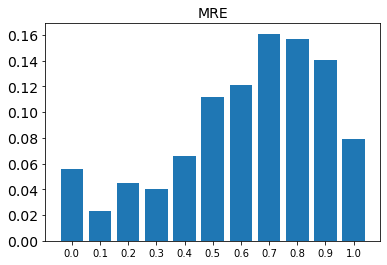

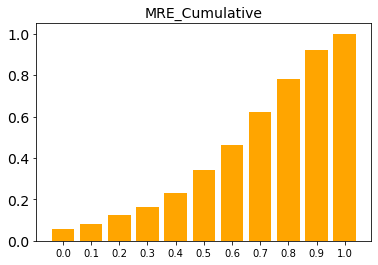

In [51]:
values = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
c0 = mre_list.count(0.0) / len(mre_list)
c1 = mre_list.count(0.1) / len(mre_list)
c2 = mre_list.count(0.2) / len(mre_list)
c3 = mre_list.count(0.3) / len(mre_list)
c4 = mre_list.count(0.4) / len(mre_list)
c5 = mre_list.count(0.5) / len(mre_list)
c6 = mre_list.count(0.6) / len(mre_list)
c7 = mre_list.count(0.7) / len(mre_list)
c8 = mre_list.count(0.8) / len(mre_list)
c9 = mre_list.count(0.9) / len(mre_list)
c10 = mre_list.count(1.0) / len(mre_list)
counts = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10])
counts_cumul = np.cumsum(counts)
print(counts)


plt.bar(values, counts)
plt.title('MRE', fontsize = 14)
plt.xticks(values)
plt.yticks(fontsize = 14)
plt.show()

plt.bar(values, counts_cumul, color='orange')
plt.title('MRE_Cumulative', fontsize = 14)
plt.xticks(values)
plt.yticks(fontsize = 14)
plt.show()

In [52]:
ma_list

[0.0,
 0.3333333333333333,
 0.25,
 0.25,
 0.25,
 0.2,
 0.16666666666666666,
 0.3333333333333333,
 0.4,
 0.4,
 0.25,
 1.0,
 1.0,
 0.3333333333333333,
 0.5,
 0.5,
 0.5,
 0.25,
 0.2,
 0.0,
 0.5,
 0.4,
 0.5,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 0.25,
 1.0,
 0.5,
 0.5,
 0.6666666666666666,
 0.5,
 0.25,
 0.5,
 0.75,
 0.5,
 0.25,
 0.3333333333333333,
 0.5,
 0.3333333333333333,
 0.25,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.3333333333333333,
 0.5,
 0.6,
 0.3333333333333333,
 0.5,
 0.5,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 0.25,
 0.0,
 0.25,
 0.16666666666666666,
 0.4,
 0.3333333333333333,
 0.2,
 0.3333333333333333,
 0.14285714285714285,
 0.5,
 0.6666666666666666,
 0.0,
 0.5,
 0.5,
 0.16666666666666666,
 0.25,
 0.5,
 0.14285714285714285,
 0.2,
 0.14285714285714285,
 0.5,
 0.3333333333333333,
 0.2,
 0.2,
 0.6666666666666666,
 0.0,
 0.5,
 0.3333333333333333,
 0.5,
 0.3333333333333333,
 1.0,
 0.25,
 0.6666666666666666,
 0.3333333333333333,
 0.5,
 0.2,
 0.33333

[ 27  39 181 153  24 176  29   1   0   0  66]
[696 696 696 696 696 696 696 696 696 696 696]
[0.0387931  0.05603448 0.26005747 0.21982759 0.03448276 0.25287356
 0.04166667 0.00143678 0.         0.         0.09482759]
['[0.0, 0.1)', '[0.1, 0.2)', '[0.2, 0.3)', '[0.3, 0.4)', '[0.4, 0.5)', '[0.5, 0.6)', '[0.6, 0.7)', '[0.7, 0.8)', '[0.8, 0.9)', '[0.9, 1.0)', '1.0']


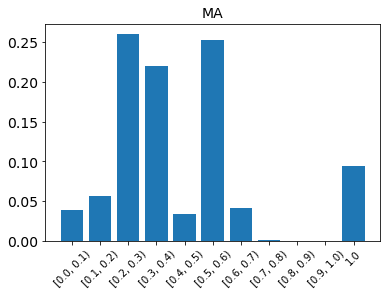

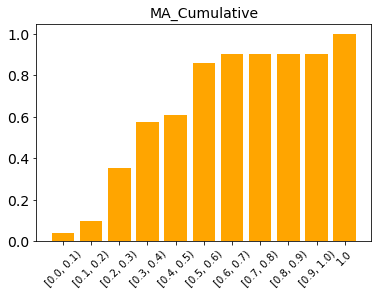

In [53]:
bins = np.arange(0, 1.2, 0.1)
hist, bins = np.histogram(np.array(ma_list), bins)

ma_values = ['[0.0, 0.1)', '[0.1, 0.2)', '[0.2, 0.3)', '[0.3, 0.4)', '[0.4, 0.5)', '[0.5, 0.6)', '[0.6, 0.7)', '[0.7, 0.8)', '[0.8, 0.9)', '[0.9, 1.0)', '1.0']
denominator = np.array([len(ma_list) for i in range(len(ma_values))])
print(hist)
print(denominator)
ma_counts = hist / len(ma_list)
print(ma_counts)
print(ma_values)
ma_counts_cumul = np.cumsum(ma_counts)

# plt.hist((ma_array), bins, rwidth = 0.8)
# plt.title('MA', fontsize = 14)
# plt.xticks(np.arange(0, 1.0, 0.1))
# plt.yticks(fontsize = 14)
# plt.show()

plt.bar(ma_values, ma_counts)
plt.title('MA', fontsize = 14)
plt.xticks(ma_values)
plt.xticks(rotation=45)
plt.yticks(fontsize = 14)
plt.show()

plt.bar(ma_values, ma_counts_cumul, color='orange')
plt.title('MA_Cumulative', fontsize = 14)
plt.xticks(ma_values)
plt.xticks(rotation=45)
plt.yticks(fontsize = 14)
plt.show()